In [2]:
import numpy as np
import pandas as pd

In [3]:
np_array_store_file = f'/home/valentin-rexer/uni/UofM/datascience/datasets/len_500_data.npz'

data = np.load(np_array_store_file)
X = data['X']
y = data['y']

print(X.shape, y.shape)

(267286, 1000, 6) (267286,)


In [4]:
X = X.reshape(X.shape[0], -1)
X

array([[ 0.22589695, -0.15022601, -0.70326626, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.22589695, -0.15022601, -0.70326626, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.22589695, -0.15022601, -0.70326626, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.22589695, -0.15022601, -0.70326626, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.22589695, -0.15022601, -0.70326626, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.22589695, -0.15022601, -0.70326626, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_trian, y_test = train_test_split(X,y, train_size=0.9, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300, random_state=0)

In [8]:
rfc.fit(X_train, y_trian)

RandomForestClassifier(n_estimators=300, random_state=0)

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef

y_pred = rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("CR:", classification_report(y_test, y_pred))
print("MCC:", matthews_corrcoef(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.8166411014254181
CR:               precision    recall  f1-score   support

           1       1.00      0.64      0.78      3372
           2       0.68      0.97      0.80      9309
           3       0.86      0.74      0.79      5656
           4       1.00      0.75      0.86      2596
           5       1.00      0.73      0.84      1542
           6       0.99      0.81      0.89      2839
           7       1.00      0.78      0.88      1415

    accuracy                           0.82     26729
   macro avg       0.93      0.77      0.83     26729
weighted avg       0.86      0.82      0.82     26729

MCC: 0.7728252750681036
[[2152 1044  171    0    0    5    0]
 [   1 9062  239    0    0    7    0]
 [   3 1484 4162    0    0    7    0]
 [   1  546  106 1941    0    2    0]
 [   0  367   55    0 1119    1    0]
 [   0  500   53    0    0 2286    0]
 [   1  241   67    0    0    0 1106]]


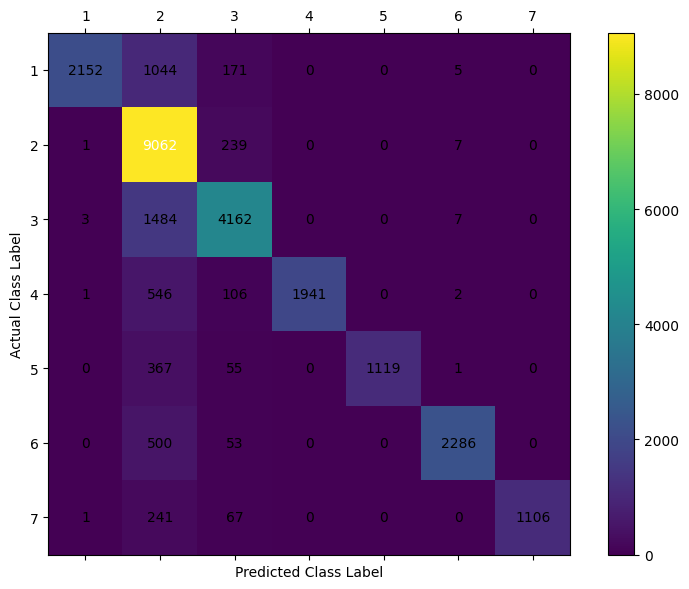

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix data
confusion_matrix = np.array([
    [2152, 1044, 171, 0, 0, 5, 0],
    [1, 9062, 239, 0, 0, 7, 0],
    [3, 1484, 4162, 0, 0, 7, 0],
    [1, 546, 106, 1941, 0, 2, 0],
    [0, 367, 55, 0, 1119, 1, 0],
    [0, 500, 53, 0, 0, 2286, 0],
    [1, 241, 67, 0, 0, 0, 1106]
])

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(confusion_matrix, cmap='viridis')

# Add a colorbar
fig.colorbar(cax)

# Add labels
ax.set_xlabel('Predicted Class Label')
ax.set_ylabel('Actual Class Label')

# Add class labels
classes = ['1', '2', '3', '4', '5', '6', '7']
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

# Add values to each cell
for (i, j), val in np.ndenumerate(confusion_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='white' if val > confusion_matrix.max()/2 else 'black')

# Tight layout for better spacing
plt.tight_layout()
plt.show()


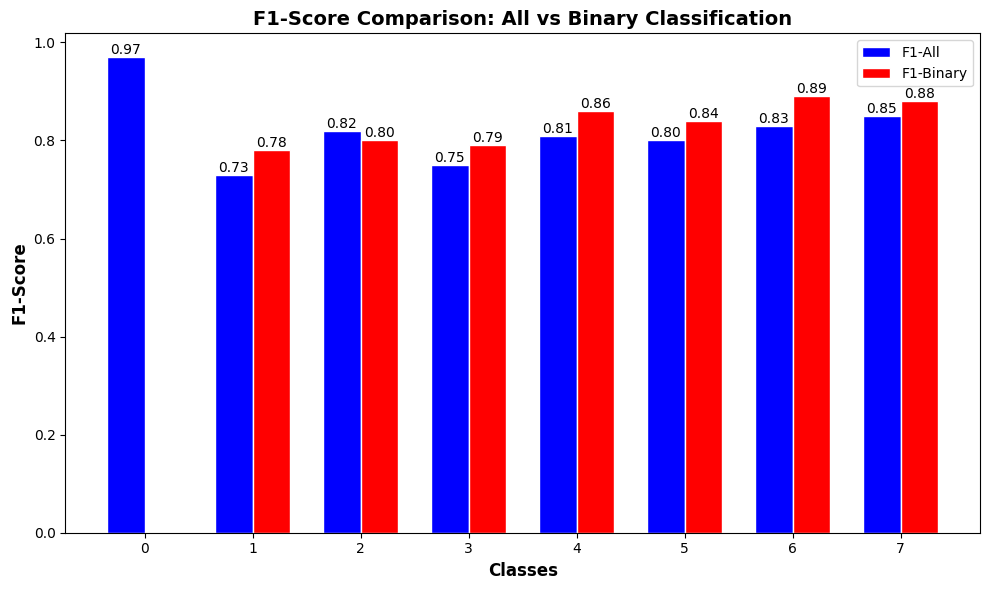

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# F1-scores data
classes = ['0', '1', '2', '3', '4', '5', '6', '7']
f1_all = [0.97, 0.73, 0.82, 0.75, 0.81, 0.80, 0.83, 0.85]
f1_binary = [np.nan, 0.78, 0.80, 0.79, 0.86, 0.84, 0.89, 0.88]

# Set up the plot
plt.figure(figsize=(10, 6))

# Create bar width and positions
bar_width = 0.35
r1 = np.arange(len(classes))
r2 = [x + bar_width for x in r1]

# Create bars
plt.bar(r1, f1_all, color='blue', width=bar_width, edgecolor='white', label='F1-All')
plt.bar(r2, f1_binary, color='red', width=bar_width, edgecolor='white', label='F1-Binary')

# Customize the plot
plt.xlabel('Classes', fontweight='bold', fontsize=12)
plt.ylabel('F1-Score', fontweight='bold', fontsize=12)
plt.title('F1-Score Comparison: All vs Binary Classification', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width/2 for r in range(len(classes))], classes)
X_train_1, X_test_1, y_trian_1, y_test_1 = train_test_split(X,y_1, train_size=0.9, random_state=42)plt.legend()

# Add value labels on the bars
for i in range(len(classes)):
    # F1-All labels
    if not np.isnan(f1_all[i]):
        plt.text(r1[i], f1_all[i], f'{f1_all[i]:.2f}', 
                 ha='center', va='bottom')
    
    # F1-Binary labels
    if not np.isnan(f1_binary[i]):
        plt.text(r2[i], f1_binary[i], f'{f1_binary[i]:.2f}', 
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

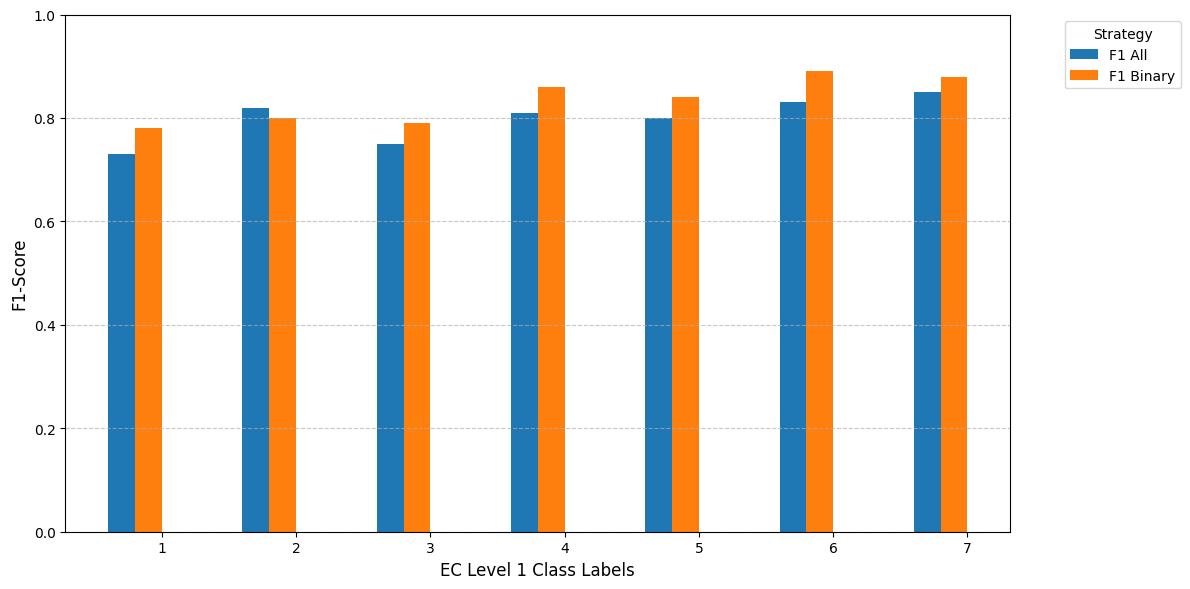

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# F1-scores for each class from the classification reports
f1_scores = {
    "F1 All": [0.73, 0.82, 0.75, 0.81, 0.80, 0.83, 0.85],
"F1 Binary": [0.78, 0.80, 0.79, 0.86, 0.84, 0.89, 0.88]
}

classes = [1, 2, 3, 4, 5, 6, 7]  # Class labels
x = np.arange(len(classes))  # X-axis positions for the classes
width = 0.2  # Adjusted bar width for 4 groups

# Create the bar plots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each strategy
offsets = [-1.5, -0.5, 0.5, 1.5]  # Offsets for each bar group
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Distinct colors

for i, (strategy, scores) in enumerate(f1_scores.items()):
    ax.bar(x + offsets[i] * width, scores, width, label=strategy, color=colors[i])

# Add labels, title, and grid
ax.set_xlabel("EC Level 1 Class Labels", fontsize=12)
ax.set_ylabel("F1-Score", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_ylim(0, 1)
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Move legend outside the plot
ax.legend(title="Strategy", bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout to fit everything
plt.tight_layout()
plt.show()
